
##Utsav Jitendrabhai Patel


In [77]:
#Importing libraries
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,f1_score,precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

In [78]:
#Importing google drive path
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
#Importing csv file
path = "/content/drive/MyDrive/Assign08/Assign08/titanic_train.csv"
df = pd.read_csv(path)

In [80]:
#Checking null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [81]:
#Droppping the Name, Ticket and Cabin
df.drop(['Name', 'Ticket','Cabin'], axis=1, inplace=True)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [82]:
# Defining a dictionary for the mapping
sex_map = {'female': 0, 'male': 1}
embarked_map = {'C': 0, 'Q': 1, 'S': 2}

# Using the replace method to map the values
df['Sex'] = df['Sex'].replace(sex_map)
df['Embarked'] = df['Embarked'].replace(embarked_map)

In [83]:
#Replacing value NAN to 0
df.fillna(value=0, inplace=True)
print(df)

     PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0              1         0       3    1  22.0      1      0   7.2500       2.0
1              2         1       1    0  38.0      1      0  71.2833       0.0
2              3         1       3    0  26.0      0      0   7.9250       2.0
3              4         1       1    0  35.0      1      0  53.1000       2.0
4              5         0       3    1  35.0      0      0   8.0500       2.0
..           ...       ...     ...  ...   ...    ...    ...      ...       ...
886          887         0       2    1  27.0      0      0  13.0000       2.0
887          888         1       1    0  19.0      0      0  30.0000       2.0
888          889         0       3    0   0.0      1      2  23.4500       2.0
889          890         1       1    1  26.0      0      0  30.0000       0.0
890          891         0       3    1  32.0      0      0   7.7500       1.0

[891 rows x 9 columns]


In [84]:
#Checking the null value after cleaning
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [85]:
#Training and testing the data
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
X_train, X_test, y_train, y_test = train_test_split(df.drop("Survived", axis=1), df["Survived"], test_size=0.2, random_state=42)


#Random Forest Classifier

In [86]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10,max_features='sqrt', bootstrap = True, oob_score = True, random_state=101)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, oob_score=True, random_state=101)

In [87]:
# Getting Predictions from test data
y_pred= rf.predict(X_test) 

In [88]:
#Finding Accuracy
Accuracy = np.mean(y_pred == y_test) * 100
print("Avg accuracy : %2.2f" % (Accuracy))

Avg accuracy : 82.68


In [89]:
font = {
    'weight' : 'bold',
    'size'   : 15}
plt.rc('font', **font)

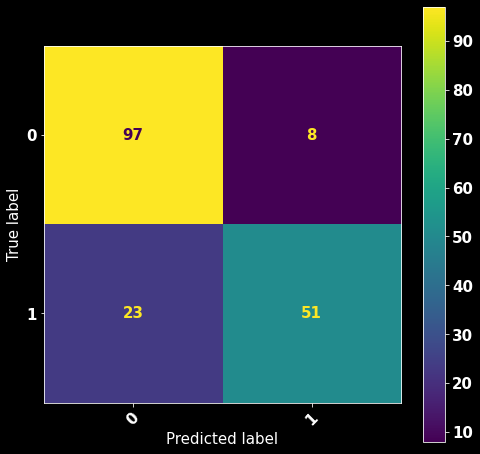

In [90]:
#Printing Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1])
disp.plot(xticks_rotation=45)
fig = disp.ax_.get_figure() 
fig.set_figwidth(8)
fig.set_figheight(8) 
plt.show()

In [91]:
#Printing Accuracy, Precision, Recall and F-1 score.
Metrics = pd.DataFrame({"Accuracy":[accuracy_score(y_test, y_pred, normalize=True)]
,"Precision":[precision_score(y_test, y_pred, average = 'macro')]
,"Recall":[recall_score(y_test, y_pred, average = 'macro')]
,"F1-Score":[f1_score(y_test, y_pred, average = 'macro')]})
Metrics

,Accuracy,Precision,Recall,F1-Score
0,0.826816,0.83637,0.806499,0.81457


#Decision Tree Classifier

In [92]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [93]:
# Getting Predictions from test data
y_pred= dt.predict(X_test) 

In [94]:
#Finding Accuracy
Accuracy = np.mean(y_pred == y_test) * 100
print("Avg accuracy : %2.2f" % (Accuracy))

Avg accuracy : 76.54


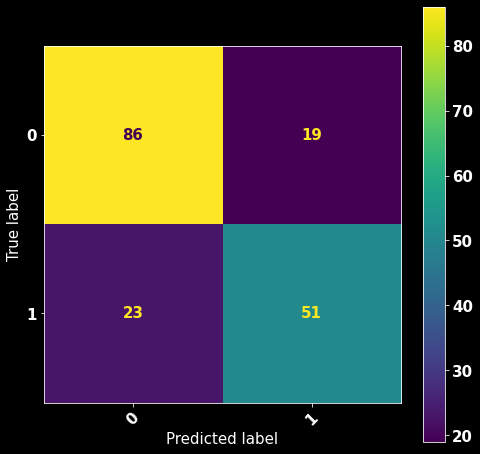

In [95]:
#Printing Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1])
disp.plot(xticks_rotation=45)
fig = disp.ax_.get_figure() 
fig.set_figwidth(8)
fig.set_figheight(8) 
plt.show()

In [96]:
#Printing Accuracy, Precision, Recall and F-1 score.
Metrics = pd.DataFrame({"Accuracy":[accuracy_score(y_test, y_pred, normalize=True)]
,"Precision":[precision_score(y_test, y_pred, average = 'macro')]
,"Recall":[recall_score(y_test, y_pred, average = 'macro')]
,"F1-Score":[f1_score(y_test, y_pred, average = 'macro')]})
Metrics

,Accuracy,Precision,Recall,F1-Score
0,0.765363,0.758781,0.754118,0.756036
